In [1]:
import pandas as pd 
df=pd.read_csv('./Datas.csv', encoding='latin-1',sep=";")
df.head()

,Ordre de travail,Staut Ordre de travail,Service,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification Equipement,Date début,Date Fin,Modèle OT,Type OT
0,OT000001,clôturé,ECP BEURRE,NaN,GCULZ201,Production Beurre creme fraiche,NaN,GCULZ2,Zone 2,Mec,03/01/2019,03/01/2019,NaN,correctif planifié
1,OT000002,clôturé,ECP UHT,NaN,GCULZ103,Production UHT,NaN,GCULZ1,Zone 1,Mec,02/01/2019,02/01/2019,NaN,correctif planifié
2,OT000003,en cours INV,Poste URA,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mec,03/01/2019,03/01/2019,NaN,correctif planifié
3,OT000011,en cours INV,Fuite huile machoire droite,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mec,03/01/2019,03/01/2019,NaN,correctif planifié
4,OT000012,clôturé,ELECTRIQUE,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,02/01/2019 10:00,ULPRPS02,BOUTEILLE,NaN,02/01/2019,02/01/2019,NaN,correctif planifié


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

PFC206          881
PFC201          651
PFC101          541
ULPRPH0305      539
ULPRPH0405      451
               ... 
PFP10310          1
PFS10400          1
ULPRPH020804      1
GCULZ314          1
ULPRPH0406        1
Name: Equipment, Length: 1093, dtype: int64


<AxesSubplot:title={'center':'Nombre de pannes total par équipement'}, xlabel='Equipment', ylabel='count'>

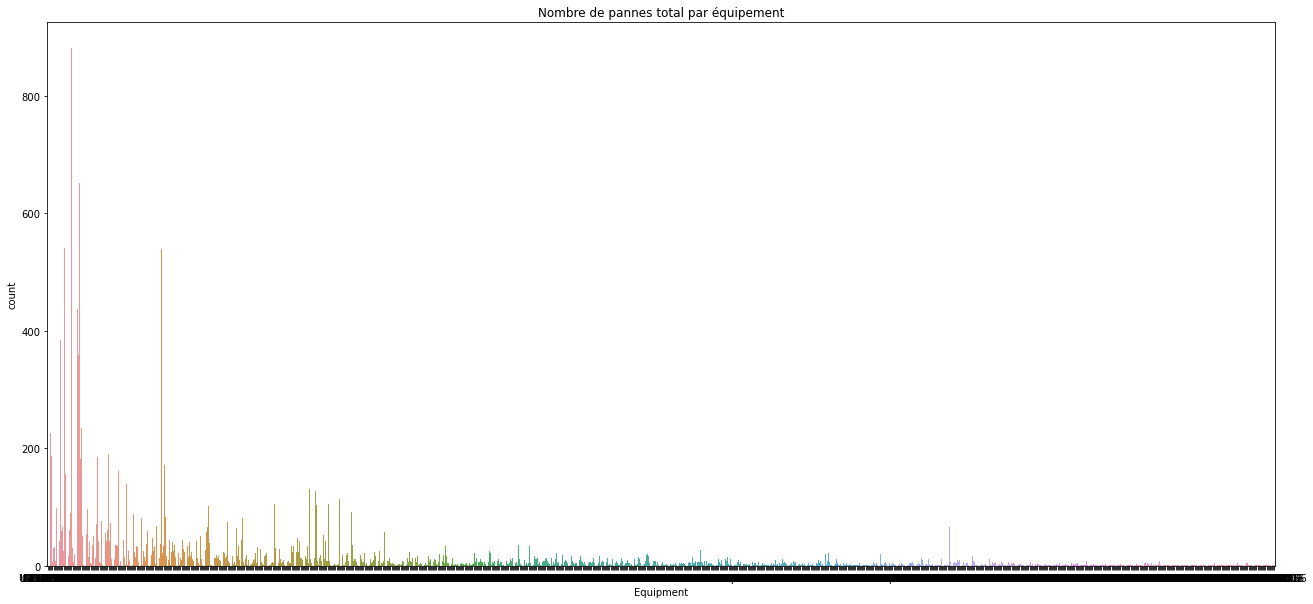

In [3]:
print(df['Equipment'].value_counts())
plt.figure(figsize=(22,10))
plt.title("Nombre de pannes total par équipement")
sns.countplot(x=df['Equipment'])

PFC1          2310
PFC2          2244
PAV003         907
ULPRPH03       755
ULPRPH04       646
              ... 
PFL005           1
PFC205           1
ULPRPH0106       1
PFP115           1
PFP11500         1
Name: Noeud Parent, Length: 197, dtype: int64


<AxesSubplot:title={'center':'Nombre de pannes total par zone'}, xlabel='Noeud Parent', ylabel='count'>

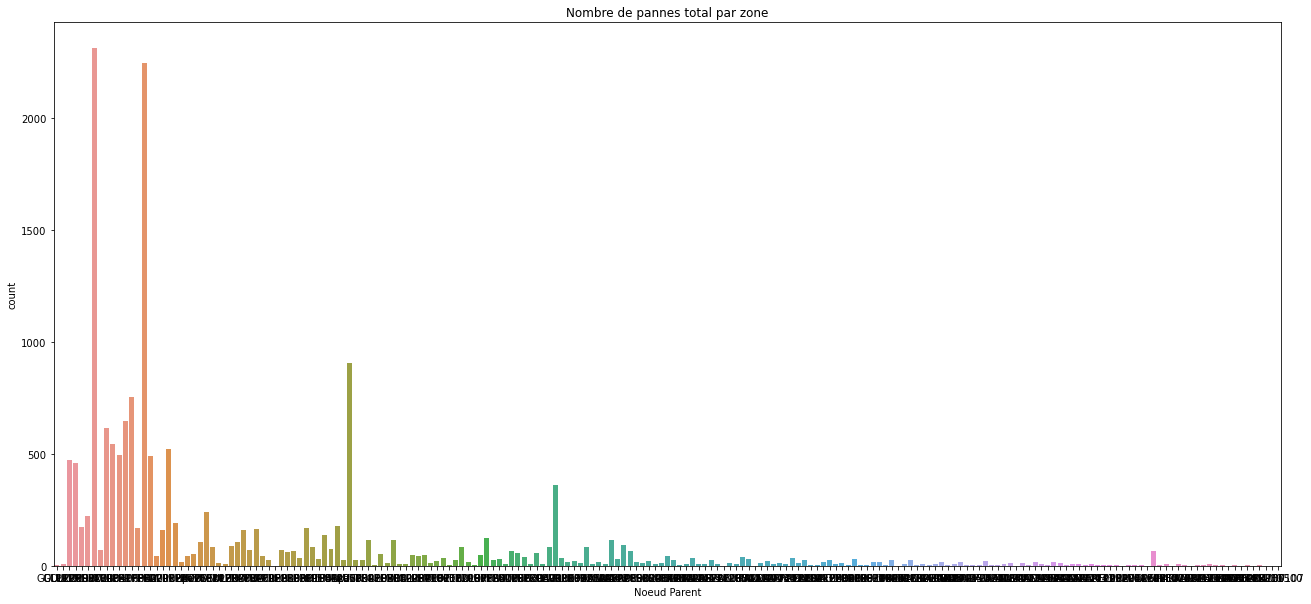

In [4]:
print(df['Noeud Parent'].value_counts())
plt.figure(figsize=(22,10))
plt.title("Nombre de pannes total par zone")
sns.countplot(x=df['Noeud Parent'])

In [5]:


import numpy as np

<BarContainer object of 10 artists>

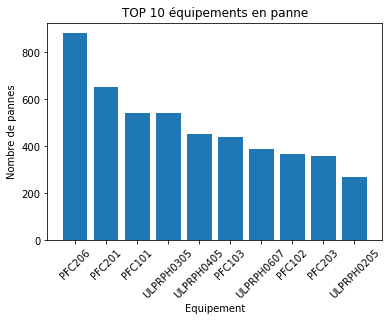

In [6]:
df_st=df.groupby(['Equipment']).count() 
df_st1=df_st['Ordre de travail']
df_st2= df_st1.rename_axis('Equipement').reset_index()
df_st2.rename(columns={'Ordre de travail': 'Nombre de pannes'}, inplace=True)
top10=df_st2.sort_values('Nombre de pannes',ascending=False).head(10) 
plt.xticks(rotation='45')
plt.title("TOP 10 équipements en panne")
plt.xlabel('Equipement')
plt.ylabel("Nombre de pannes")
plt.bar(top10['Equipement'],top10['Nombre de pannes'])

<BarContainer object of 10 artists>

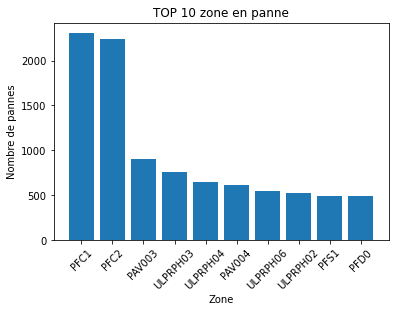

In [7]:
df_st=df.groupby(['Noeud Parent']).count()
df_st1=df_st['Ordre de travail']
df_st2= df_st1.rename_axis('Noeud Parent').reset_index()
df_st2.rename(columns={'Ordre de travail': 'Nombre de pannes'}, inplace=True)
top10=df_st2.sort_values('Nombre de pannes',ascending=False).head(10)
plt.xticks(rotation='45')
plt.title("TOP 10 zone en panne")
plt.xlabel('Zone')
plt.ylabel("Nombre de pannes")
plt.bar(top10['Noeud Parent'],top10['Nombre de pannes'])

([<matplotlib.patches.Wedge at 0x1b4381b4a90>,
 [Text(-0.6234923745342534, 0.9062324530150299, ''),
  Text(0.623492289686645, -0.906232511390595, '')],
 [Text(-0.3400867497459564, 0.4943086107354707, '69.2%'),
  Text(0.34008670346544273, -0.49430864257668816, '30.8%')])

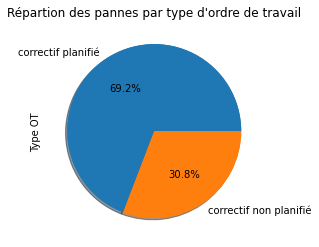

In [8]:
df["Type OT"].value_counts(normalize=True).plot(kind='pie')
plt.title("Répartion des pannes par type d'ordre de travail")
colors = ['lightblue', 'navy']
plt.pie(df["Type OT"].value_counts(),autopct='%1.1f%%',shadow=True)


([<matplotlib.patches.Wedge at 0x1b438863ee0>,
 [Text(-0.859173144694007, -0.6868926462240014, ''),
  Text(1.0832759644991532, 0.19108423466741012, ''),
  Text(0.773894589101861, 0.7817206438100901, ''),
  Text(0.4567680766604047, 1.0006812300347971, ''),
  Text(0.2217780713246657, 1.0774110112113722, ''),
  Text(0.08325418385365627, 1.0968449028330587, ''),
  Text(0.029944406057271493, 1.0995923483481855, ''),
  Text(0.011718597288169435, 1.0999375775368336, ''),
  Text(0.005859377647733381, 1.0999843942954743, ''),
  Text(0.0022786510362250165, 1.0999976398835842, ''),
  Text(0.0006510377546145832, 1.0999998073408204, '')],
 [Text(-0.46863989710582193, -0.3746687161221825, '71.5%'),
  Text(0.5908777988177198, 0.10422776436404187, '12.6%'),
  Text(0.4221243213282878, 0.4263930784418673, '7.0%'),
  Text(0.249146223632948, 0.5458261254735257, '4.2%'),
  Text(0.12096985708618128, 0.5876787333880211, '2.9%'),
  Text(0.04541137301108523, 0.598279037908941, '1.1%'),
  Text(0.016333312394875

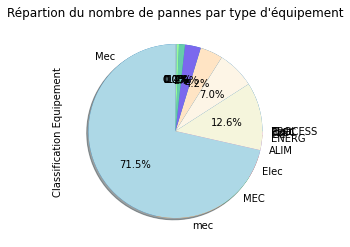

In [9]:
df["Classification Equipement"].value_counts(normalize=True).plot(kind='pie')
plt.title("Répartion du nombre de pannes par type d'équipement")
colors = ['lightblue', 'beige','oldlace','bisque','mediumslateblue','mediumaquamarine','palegreen']

plt.pie(df["Classification Equipement"].value_counts(), colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)